## Challenge 1 - Combining Dataframes with pandas
Create a new DataFrame by joining the contents of the surveys.csv and species.csv tables. Then calculate and plot the distribution of:

    taxa by plot
    taxa by sex by plot


Import files

In [1]:
import pandas as pd
import numpy as np
surveys_df = pd.read_csv("data/surveys.csv")
species_df = pd.read_csv("data/species.csv")

Explore headers to define join keys

In [2]:
print(surveys_df.columns)
print(species_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')
Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')


Merge both files using species_id
If there species_id that do not have taxa, identify that taxa as Unidentified


In [3]:
merged_data = pd.merge(left=surveys_df,right=species_df, how='inner', left_on='species_id', right_on='species_id')
#merged_left['taxa'] = merged_left['taxa'].fillna('Unidentified')
merged_data.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
1,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
2,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
3,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
4,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent


Grouping by plot

In [4]:
grouped_by_plot = merged_data.groupby('plot_id')

I am not sure if your want to count the "unique" taxa found in each plot. The next code reflects that:

In [5]:
taxa_count=grouped_by_plot['taxa'].nunique()
taxa_count.head()

plot_id
1    4
2    5
3    4
4    3
5    4
Name: taxa, dtype: int64

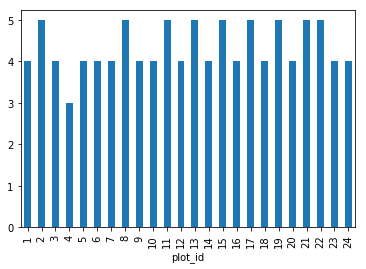

In [6]:
%matplotlib inline
taxa_count.plot(kind='bar')


The previous plot shows how many taxas were found per plot.

However, you might wanted us to show a stacked bar plot to show the number of animals per taxa found in each plot. The next code reflects that.

Checking what values are in taxa field. Creating a list with those values

In [7]:
taxa_labels=list(set(merged_data.taxa))
plot_labels=list(set(merged_data.plot_id))
print(taxa_labels)
print(plot_labels)

['Rodent', 'Bird', 'Reptile', 'Rodent-not censused', 'Rabbit']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


Creation of lists that contain information of the sum of animals per taxa per plot

In [8]:
grouped_by_plot = merged_data.groupby(['plot_id','taxa'])['record_id'].count()
grouped_by_plot.head()

plot_id  taxa               
1        Bird                     11
         Rabbit                    2
         Rodent                 1909
         Rodent-not censused      19
2        Bird                     17
Name: record_id, dtype: int64

In [9]:
per_plot=[]
for animal in taxa_labels:
    sum_list=[]
    for plot in plot_labels:
        try:
            sum_list.append(grouped_by_plot[plot][animal])
        except:
            sum_list.append(0)
    per_plot.append(list(sum_list))
print(per_plot)

[[1909, 1958, 1690, 1934, 1145, 1523, 748, 1844, 1860, 437, 1837, 2130, 1399, 1749, 898, 608, 1872, 1350, 1152, 1161, 1110, 1353, 497, 908], [11, 17, 17, 5, 5, 20, 28, 10, 13, 12, 10, 31, 48, 17, 23, 15, 4, 12, 14, 51, 13, 16, 41, 17], [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0], [19, 14, 19, 24, 15, 21, 27, 27, 39, 8, 21, 30, 50, 53, 96, 16, 50, 20, 11, 42, 30, 9, 23, 22], [2, 3, 5, 0, 1, 0, 0, 1, 1, 10, 5, 8, 1, 4, 3, 3, 6, 1, 8, 0, 1, 2, 8, 2]]


/Users/diegofutbolero/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/multi.py:819: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


Creation of the Data Frame 

In [10]:
d={taxa_labels[0]:pd.Series(per_plot[0], index=plot_labels),
  taxa_labels[1]:pd.Series(per_plot[1], index=plot_labels),
  taxa_labels[2]:pd.Series(per_plot[2], index=plot_labels),
  taxa_labels[3]:pd.Series(per_plot[3], index=plot_labels),
  taxa_labels[4]:pd.Series(per_plot[4], index=plot_labels)}
final_dataframe=pd.DataFrame(d)
final_dataframe.head

<bound method NDFrame.head of     Bird  Rabbit  Reptile  Rodent  Rodent-not censused
1     11       2        0    1909                   19
2     17       3        1    1958                   14
3     17       5        0    1690                   19
4      5       0        0    1934                   24
5      5       1        0    1145                   15
6     20       0        1    1523                   21
7     28       0        1     748                   27
8     10       1        1    1844                   27
9     13       1        0    1860                   39
10    12      10        0     437                    8
11    10       5        2    1837                   21
12    31       8        0    2130                   30
13    48       1        1    1399                   50
14    17       4        0    1749                   53
15    23       3        1     898                   96
16    15       3        0     608                   16
17     4       6        1    1872  

Plot

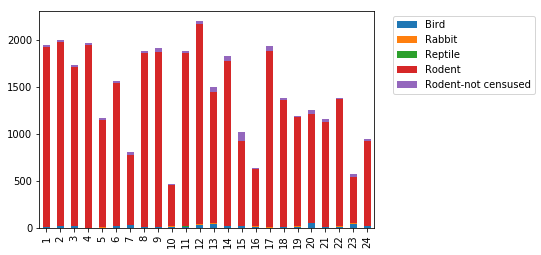

In [11]:
final_dataframe.plot(kind='bar',stacked=True)
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')

In [12]:
grouped_by_plot_and_sex = merged_data.groupby(['plot_id','sex','taxa'])['record_id'].count()
grouped_by_plot_and_sex

plot_id  sex  taxa               
1        F    Rodent                  827
         M    Rodent                 1062
2        F    Rodent                  864
         M    Rodent                 1062
3        F    Rodent                  854
         M    Rodent                  788
4        F    Rodent                  870
         M    Rodent                 1026
5        F    Rodent                  507
         M    Rodent                  580
6        F    Rodent                  729
         M    Rodent                  757
7        F    Rodent                  330
         M    Rodent                  301
8        F    Rodent                  835
         M    Rodent                  981
9        F    Rodent                  849
         M    Rodent                  986
              Rodent-not censused       1
10       F    Rodent                  141
         M    Rodent                  140
11       F    Rodent                  802
         M    Rodent                 1012


In [13]:
sex = ['M','F']
per_plot_and_sex=[]
for animal in taxa_labels:
    per_sex=[]
    for s in sex:
        sum_list=[]
        for plot in plot_labels:
            try:
                sum_list.append(grouped_by_plot_and_sex[plot][s][animal])
            except:
                sum_list.append(0)
        per_sex.append(list(sum_list))
    per_plot_and_sex.append(per_sex)
print(per_plot_and_sex)

/Users/diegofutbolero/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/multi.py:819: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


[[[1062, 1062, 788, 1026, 580, 757, 301, 981, 986, 140, 1012, 1139, 767, 1042, 390, 272, 1019, 598, 580, 580, 445, 662, 205, 449], [827, 864, 854, 870, 507, 729, 330, 835, 849, 141, 802, 968, 606, 682, 453, 218, 823, 726, 520, 554, 600, 666, 165, 425]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]


In [14]:
d={taxa_labels[0]+sex[0]:pd.Series(per_plot_and_sex[0][0], index=plot_labels),
   taxa_labels[0]+sex[1]:pd.Series(per_plot_and_sex[0][1], index=plot_labels),
   taxa_labels[1]+sex[0]:pd.Series(per_plot_and_sex[1][0], index=plot_labels),
   taxa_labels[1]+sex[1]:pd.Series(per_plot_and_sex[1][1], index=plot_labels),
   taxa_labels[2]+sex[0]:pd.Series(per_plot_and_sex[2][0], index=plot_labels),
   taxa_labels[2]+sex[1]:pd.Series(per_plot_and_sex[2][1], index=plot_labels),
   taxa_labels[3]+sex[0]:pd.Series(per_plot_and_sex[3][0], index=plot_labels),
   taxa_labels[3]+sex[1]:pd.Series(per_plot_and_sex[3][1], index=plot_labels),
   taxa_labels[4]+sex[0]:pd.Series(per_plot_and_sex[4][0], index=plot_labels),
   taxa_labels[4]+sex[1]:pd.Series(per_plot_and_sex[4][1], index=plot_labels)
  }
final_dataframe=pd.DataFrame(d)
final_dataframe

,BirdF,BirdM,RabbitF,RabbitM,ReptileF,ReptileM,Rodent-not censusedF,Rodent-not censusedM,RodentF,RodentM
1,0,0,0,0,0,0,0,0,827,1062
2,0,0,0,0,0,0,0,0,864,1062
3,0,0,0,0,0,0,0,0,854,788
4,0,0,0,0,0,0,0,0,870,1026
5,0,0,0,0,0,0,0,0,507,580
6,0,0,0,0,0,0,0,0,729,757
7,0,0,0,0,0,0,0,0,330,301
8,0,0,0,0,0,0,0,0,835,981
9,0,0,0,0,0,0,0,1,849,986
10,0,0,0,0,0,0,0,0,141,140


There is a problem in the data set.

The sex of the animal was not properly recorded. In consequence, many registers have nothing in that cell. That is the reason why for most of the "taxa" the cells shows "0" (for example, there are neither male nor female birds). Before plotting the data, it would be interesting to use some technique to include either "M" of "F". However, this is not the purpose of this excercise, and the data will be plotted as it is.

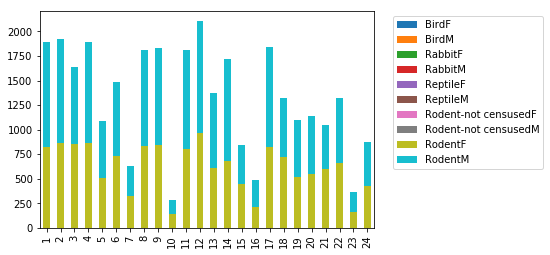

In [15]:
final_dataframe.plot(kind='bar',stacked=True)
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')

## Challenge 2
1. Rewrite the one_year_csv_writer and yearly_data_csv_writer functions to have keyword arguments with default values

2. Modify the functions so that they don’t create yearly files if there is no data for a given year and display an alert to the user (Hint: use conditional statements to do this. For an extra challenge, use try statements!)

3. Add some code to your function that writes out the CSV files, to check for a directory to write to.




To work,before running the functions, the expresion "import pandas as pd" MUST be run.

In [16]:
def one_year_csv_writer(all_data, this_year = 1977, counter = 0):
    """
    Writes a csv file for data from a given year.

    this_year --- year for which data is extracted
    all_data --- DataFrame with multi-year data
    previously run: import pandas as pd. Otherwise, the fuction will not work
    """
    #Creation of the directory
    if counter == 0:
        import os
        if 'yearly_files' in os.listdir('.'):
           print('Processed directory exists')
        else:
           os.mkdir('data/yearly_files')
           print('Processed directory created')

    
    # Select data for the year
    if min(surveys_df['year'].unique()) <= this_year and max(surveys_df['year'].unique()) >= this_year:
        surveys_year = all_data[all_data.year == this_year]

    # Write the new DataFrame to a csv file
        filename = 'data/yearly_files/function_surveys_workshop' + str(this_year) + '.csv'
        surveys_year.to_csv(filename)
    else:
        print('File for year '+ str(this_year)+ ' not created')
        
def yearly_data_csv_writer(all_data, start_year = 1977, end_year = 1977):
    """
    Writes separate CSV files for each year of data.

    start_year --- the first year of data we want
    end_year --- the last year of data we want
    all_data --- DataFrame with multi-year data
    previously run: import pandas as pd. Otherwise, the fuction will not work
    """

    # "end_year" is the last year of data we want to pull, so we loop to end_year+1
    for counter, year in enumerate(range(start_year, end_year+1)):
        one_year_csv_writer(all_data, year, counter)


Run the next lines to test the functions with default values

The created files have the name 'function_surveys_workshop_year'

In [17]:
surveys_df = pd.read_csv('data/surveys.csv')
one_year_csv_writer(surveys_df)


Processed directory exists


Run the next lines to test the functions with given values.




In [18]:
yearly_data_csv_writer(surveys_df,1980,1990)

Processed directory exists


In [19]:
yearly_data_csv_writer(surveys_df,1900,1905)

Processed directory exists
File for year 1900 not created
File for year 1901 not created
File for year 1902 not created
File for year 1903 not created
File for year 1904 not created
File for year 1905 not created


## Challenge 3

Make a variety of line plots from your data. If you are using the streamgage data, these could include (1) a hydrograph of the entire month of September 2013, (2) the discharge record for the week of the 2013 Front Range flood (September 9 through 15), (3) discharge vs. time of day, for every day in the record in one figure (Hint: use loops to combine strings and give every line a different style and color), and (4) minimum, maximum, and mean daily discharge values. Add axis labels, titles, and legends to your figures. Make at least one figure with multiple plots using the function subplot().

Importing data

The first step is to remove the header of th file that is not part of the dataset.

1. Read line by line the text file and select the data I am interested in.

In [20]:
import pandas as pd
import re
# Open the file and read the lines
f=open('data/bouldercreek_09_2013.txt','r')
lines = f.readlines()
f.close()

# create a list with the data
modified_lines=[]
for line in lines:
    text=re.findall(r'USGS\t.*',line)
    for element in text:
        modified_lines.append(element)

#Select the data we are interested in
modified_split=[]
for line in modified_lines:
    line_split=line.split('\t')
    modified_split.append(line_split)
date_time=[]
for line in modified_split:
    d_t=line[2].split(" ")
    date_time.append(d_t)

#creation of individual lists with the data
date=[]
time=[]
discharge=[]
for line in date_time:
    date.append(line[0])
    time.append(line[1])
for line in modified_split:
    discharge.append(float(line[4])*0.0283168) #transformed to m3/s




2.Creation of the Dataframe

In [21]:
discharge_df=pd.DataFrame({'date':date,'time':time,'discharge':discharge},columns=['date','time','discharge'])
discharge_df.head()


,date,time,discharge
0,2013-09-01,00:00,1.614058
1,2013-09-01,00:15,1.614058
2,2013-09-01,00:30,1.614058
3,2013-09-01,00:45,1.614058
4,2013-09-01,01:00,1.614058


Creation of plots

(1) a hydrograph of the entire month of September 2013, 

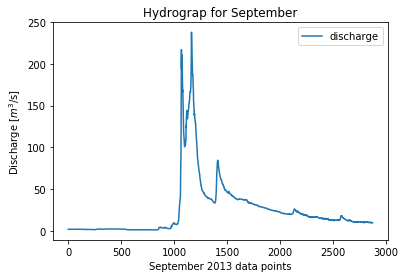

In [22]:
y=discharge_df.discharge
x=list(range(0,len(y)))
plt.plot(x,y)
plt.title('Hydrograp for September')
plt.xlabel('September 2013 data points')
plt.ylabel('Discharge [$m^3$/s]')
plt.legend()

(2) The discharge record for the week of the 2013 Front Range flood (September 9 through 15)


/Users/diegofutbolero/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


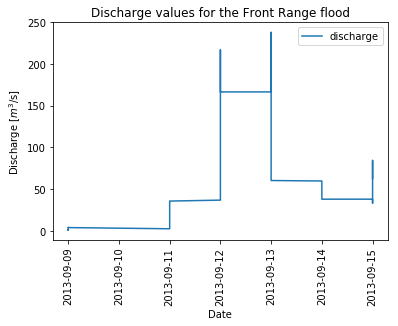

In [23]:
import re
discharge_record=[]
for date in discharge_df.date:
    dr=re.findall(r'2013-09-09',date)
    for tx in dr:    
        discharge_record.append(tx)
for date in discharge_df.date:
    dr=re.findall(r'2013-09-1[1-5]',date)
    for tx in dr:    
        discharge_record.append(tx)

record=discharge_df[discharge_df.date.isin(discharge_record)]
record.date=pd.to_datetime(record.date)
record.head()
plt.plot(record.date,record.discharge)
plt.xticks(rotation='vertical')
plt.title('Discharge values for the Front Range flood')
plt.xlabel('Date')
plt.ylabel('Discharge [$m^3$/s]')
plt.legend()



(3) Discharge vs. time of day, for every day in the record in one figure

Unfortunately, I could not write the time in the x ticks

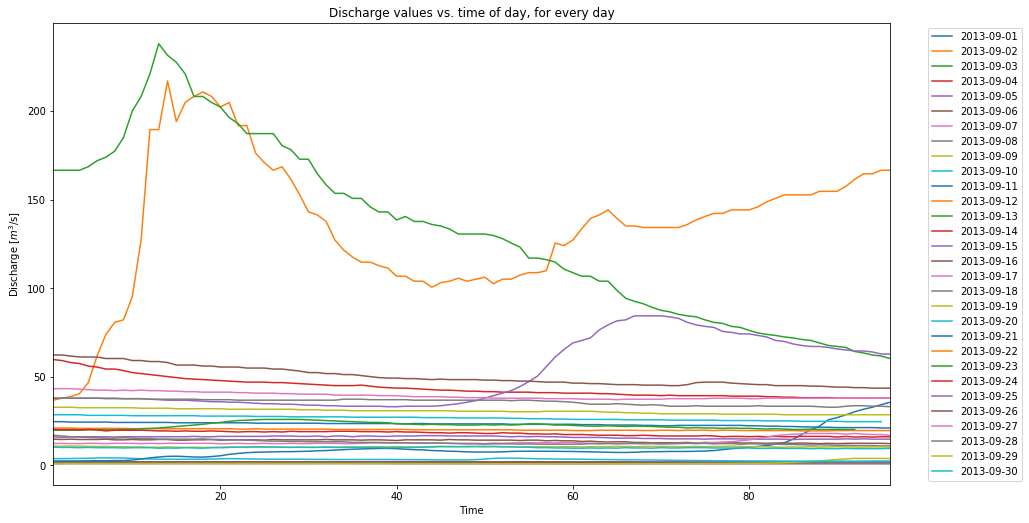

In [24]:
days=list(set(discharge_df.date))
days=sorted(days)
hours=list(set(discharge_df.time))
hours=sorted(hours)
plt.figure(figsize=(15,8.5))
for day in days:
    y=discharge_df.discharge[discharge_df.date==day]
    x=list(range(1,len(y)+1))
    plt.plot(x,y)
plt.legend(days,bbox_to_anchor=(1.04,1),loc='upper left')
ax=plt.gca()
ax.set_xlim([1,96]);
plt.title('Discharge values vs. time of day, for every day')
plt.xlabel('Time')
plt.ylabel('Discharge [$m^3$/s]')



(4) minimum, maximum, and mean daily discharge values.

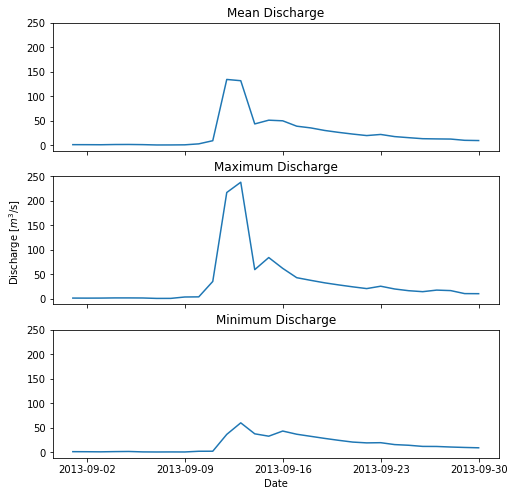

In [40]:
mean_values=[]
max_values=[]
min_values=[]
for day in days:
    y=discharge_df.discharge[discharge_df.date==day]
    y_max=y.max()
    y_min=y.min()
    y_mean=y.mean()
    mean_values.append(y_mean)
    max_values.append(y_max)
    min_values.append(y_min)
days_plot=pd.to_datetime(days)
fig,axs = plt.subplots(3,sharex=True,sharey=True,figsize=(8,8))

# Mean
ax=axs[0]
ax.plot(days_plot,mean_values)
ax.set_title('Mean Discharge')

#Maximum
ax=axs[1]
ax.plot(days_plot,max_values)
ax.set_title('Maximum Discharge')

#Minimum
ax=axs[2]
ax.plot(days_plot,min_values)
ax.set_title('Minimum Discharge')

plt.xlabel('Date')
fig.text(0.06,0.5,'Discharge [$m^3$/s]',ha='center',va='center',rotation='vertical')
